# 🏭 Predicting the Sale Price of  Products

In this notebook we're going to build a machine learning model which could predict the sale price of various products of a retail company “ABC Private limited” .

## 1. Problem Definition
> How well can we predict the future sale price of a product, given its characteristics and previous examples of how much similar products have been sold for?

## 2. Data

This data is downloaded from <a href="https://datahack.analyticsvidhya.com/contest/black-friday/" target="_blank"> Competition at Analytics Vidhya</a> 
> * They have shared purchase summary of various customers for selected high volume products from last month.
> * The data set also contains customer demographics , product details, Total purchase amount from last month.

## 3. Evaluation
> * **Submissions are scored on Root Mean Squared Error (RMSE).** RMSE punishes large errors.
> * Your model performance will be evaluated on the basis of your prediction of the purchase amount for test data (test.csv) , which contains similar data-points as train except for their purchase amount. 
> * Your submission needs to be in format of “SampleSubmissions.csv”.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
#  Importing training an validation set
df = pd.read_csv("data/train_data/train.csv",
                low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

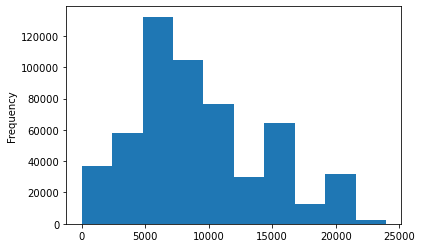

In [5]:
df.Purchase.plot.hist();

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


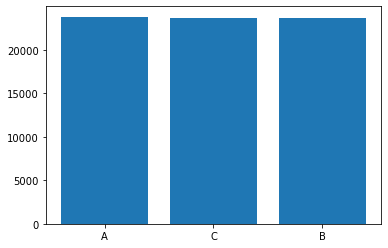

In [7]:
fig,ax =plt.subplots()
ax.bar(df["City_Category"][:1000], df["Purchase"][:1000])
plt.show()

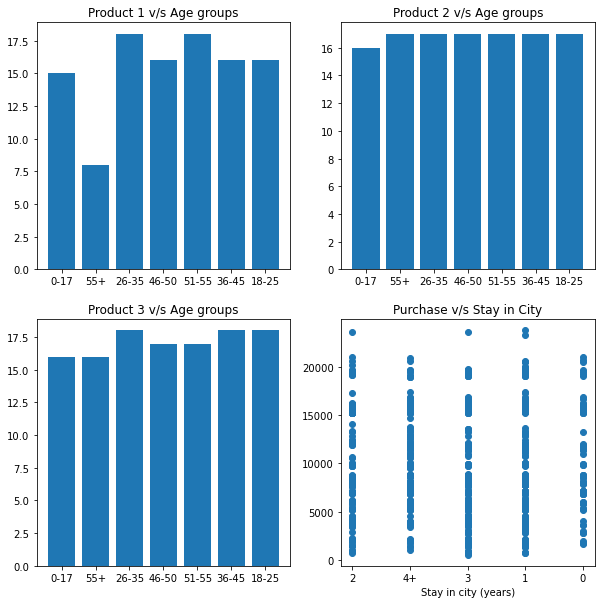

In [8]:
fig,((ax1,ax2),(ax3,ax4)) =plt.subplots(nrows=2,
                                       ncols=2,
                                       figsize=(10,10))
ax1.bar(df["Age"][:1000], df["Product_Category_1"][:1000])
ax2.bar(df["Age"][:1000],df["Product_Category_2"][:1000])
ax3.bar(df["Age"][:1000],df["Product_Category_3"][:1000])
ax4.scatter(df["Stay_In_Current_City_Years"][:1000], df["Purchase"][:1000])

ax1.set(title="Product 1 v/s Age groups")
ax2.set(title="Product 2 v/s Age groups")
ax3.set(title="Product 3 v/s Age groups")
ax4.set(title="Purchase v/s Stay in City",
       xlabel="Stay in city (years)")
plt.show()

## Making a copy of original dataset

In [9]:
df_temp = df.copy()

In [10]:
df_temp.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Filling missing values

In [12]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

User_ID
Occupation
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3
Purchase


In [13]:
#  Checking for numeric columns having null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Product_Category_2
Product_Category_3


In [14]:
#  Now filling numeric rows with median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Adding columns if data is missing
            df_temp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing values
            df_temp[label] = content.fillna(content.median())

In [15]:
# now checking for missing values
df_temp.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Product_Category_2_is_missing    0
Product_Category_3_is_missing    0
dtype: int64

#### Now we have to convert all our data into numbers 

1. Finding the columns which contains strings.

In [16]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Product_ID
Gender
Age
City_Category
Stay_In_Current_City_Years


In [17]:
df_temp.drop("Product_ID", axis=1, inplace=True)

#### Splitting the data into train and validation sets

In [18]:
X = df_temp.drop("Purchase", axis=1)
y = df_temp["Purchase"]

from sklearn.model_selection import train_test_split
X_train,X_val, y_train, y_val = train_test_split(X,y,test_size=0.2) 

len(X_train), len(X_val), len(y_train), len(y_val)

(440054, 110014, 440054, 110014)

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Age", "Gender", "City_Category", "Stay_In_Current_City_Years"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot, 
                                 categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[1.0, 0.0, 0.0, ..., 14.0, True, True],
       [1.0, 0.0, 0.0, ..., 14.0, False, False],
       [1.0, 0.0, 0.0, ..., 14.0, True, True],
       ...,
       [0.0, 0.0, 1.0, ..., 14.0, True, True],
       [0.0, 0.0, 0.0, ..., 14.0, True, True],
       [0.0, 0.0, 0.0, ..., 14.0, True, True]], dtype=object)

In [20]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,0,0,0,0,0,0,1,0,1,...,0,0,1000001,10,0,3,9,14,True,True
1,1,0,0,0,0,0,0,1,0,1,...,0,0,1000001,10,0,1,6,14,False,False
2,1,0,0,0,0,0,0,1,0,1,...,0,0,1000001,10,0,12,9,14,True,True
3,1,0,0,0,0,0,0,1,0,1,...,0,0,1000001,10,0,12,14,14,False,True
4,0,0,0,0,0,0,1,0,1,0,...,0,1,1000002,16,0,8,9,14,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0,0,0,0,0,1,0,0,1,0,...,0,0,1006033,13,1,20,9,14,True,True
550064,0,0,1,0,0,0,0,1,0,0,...,1,0,1006035,1,0,20,9,14,True,True
550065,0,0,1,0,0,0,0,1,0,0,...,0,1,1006036,15,1,20,9,14,True,True
550066,0,0,0,0,0,0,1,1,0,0,...,0,0,1006038,1,0,20,9,14,True,True


In [21]:
#  Re-distributing the data
X_train,X_val, y_train, y_val = train_test_split(transformed_X,
                                                 y,
                                                 test_size=0.2) 


In [22]:
df_temp.isna().sum()

User_ID                          0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Product_Category_2_is_missing    0
Product_Category_3_is_missing    0
dtype: int64

## Making evaluation function

In [23]:
### Building an evaluation function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y_test,y_preds):
    """
    Calculates root mean squared error between predictions and true labels.
    """
    return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(model):
    """
    Shows the various scoring parameters your model has been evaluated on.
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_val,val_preds),
              "Training RMSE": rmse(y_train,train_preds),
              "Valid RMSE": rmse(y_val,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_val,val_preds)}
    return scores

## Building model

In [24]:
#  First running model only on 10000 samples

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42, 
                              max_samples=10000)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [25]:
model.score(X_train, y_train)

0.6844284221951051

In [26]:
show_scores(model)

{'Training MAE': 2110.378486809204,
 'Valid MAE': 2166.598575068837,
 'Training RMSE': 2822.2747581921367,
 'Valid RMSE': 2898.0099822798893,
 'Training R^2': 0.6844284221951051,
 'Valid R^2': 0.6666357991204142}

### Hyperparameter tuning with RandomizedSearchCV

In [ ]:
# %%time
# from sklearn.model_selection import RandomizedSear/chCV

# # Different RandomForestRegressor hyperparameters
# rf_grid = {"n_estimators":np.arange(10,100,10),
#            "max_depth": [None,3,5,10],
#            "min_samples_split":np.arange(2,20,2),
#            "min_samples_leaf":np.arange(1,20,2),
#            "max_features":[0.5,1,"sqrt","auto"]}

# # Instantiate RandomizedSearchCV
# rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
#                                                     random_state=42),
#                               param_distributions=rf_grid,
#                               n_iter=30,
#                               cv=5,
#                               verbose=True)

# # Fit the RandomizedSearchCV model
# rs_model.fit(X_train,y_train)